# Thomas Fire and twitter data analysis

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())



In [156]:
census_pd_complete=pd.read_csv("California_census_data_with_location.csv",delimiter=',',encoding="ISO-8859-1")
census_pd_complete.head()

,Unnamed: 0,State,ZIP_Code,Population,Male,Female,Median Age,Race,Poverty Count,Poverty Rate,...,Median Value ($) for Housing Units,White alone race,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Some other race alone,Lat,Lng,City,county
0,1585,California,95903,1622,959,663,22.7,1622,140,8.631319,...,-666666666,1092,219,1,90,35,39.117092,-121.388467,Beale Air Force Base,Yuba County
1,1592,California,95918,2468,1479,989,52.9,2468,192,7.779579,...,350800,2160,34,100,30,14,39.293980,-121.331288,Browns Valley,Yuba County
2,1593,California,95919,1184,753,431,58.4,1184,149,12.584459,...,161600,936,0,0,30,0,39.433854,-121.239744,Brownsville,Yuba County
3,1597,California,95925,143,85,58,26.6,143,0,0.000000,...,-666666666,143,0,0,0,0,39.482811,-121.153856,Challenge,Yuba County
4,1603,California,95935,654,287,367,35.2,654,176,26.911315,...,320700,618,28,0,0,0,39.366426,-121.182493,Dobbins,Yuba County


In [157]:
census_pd_complete.shape

(1769, 26)

In [152]:
census_pd_complete.loc[:'Population' ,:'Poverty' ,:'Rate for Housing Units']

IndexingError: Too many indexers

In [84]:
#selecting county affected by Thomas Fire
# active_fire_zone_df=census_pd_complete[census_pd_complete['county']=='Ventura County']

active_fire_zone_df=census_pd_complete[census_pd_complete.county.isin(['Ventura County','Santa Barbara County'])]
# #selecting specific areas in county affected by Thomas Fire
# active_fire_zone_df=active_fire_county_df[active_fire_county_df.Lat>=34.25]
# active_fire_zone_df=active_fire_county_df[active_fire_county_df.Lat<=34.35]
# active_fire_zone_df=active_fire_county_df[active_fire_county_df.Lng>=-119.22]
# active_fire_zone_df=active_fire_county_df[active_fire_county_df.Lng<=-119.45]

active_fire_zone_df


,Unnamed: 0,State,ZIP_Code,Population,Male,Female,Median Age,Race,Poverty Count,Poverty Rate,...,Median Value ($) for Housing Units,White alone race,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Some other race alone,Lat,Lng,City,county
20,214,California,91320,45502,23125,22377,40.6,45502,2293,5.039339,...,619100,35991,499,61,5268,1947,34.181067,-118.947042,Newbury Park,Ventura County
21,233,California,91360,43222,20853,22369,42.4,43222,3904,9.032437,...,597800,34832,338,185,3491,2450,34.202470,-118.874143,Thousand Oaks,Ventura County
22,239,California,91377,14885,7182,7703,41.7,14885,676,4.541485,...,688300,11836,168,23,2019,103,34.188033,-118.760611,Oak Park,Ventura County
23,658,California,93003,51041,24724,26317,39.8,51041,4445,8.708685,...,459600,42004,796,414,2599,2425,34.298535,-119.220455,Ventura,Ventura County
24,659,California,93004,30218,14839,15379,40.0,30218,3531,11.685088,...,442800,24671,619,142,1341,1539,34.276578,-119.168137,Ventura,Ventura County
25,660,California,93010,44761,22017,22744,38.8,44761,3135,7.003865,...,532400,34120,1143,146,4052,2853,34.233091,-119.080901,Camarillo,Ventura County
26,661,California,93012,35714,16846,18868,42.3,35714,1668,4.670437,...,531700,28289,832,133,3511,757,34.229594,-118.976152,Camarillo,Ventura County
27,663,California,93015,17487,8432,9055,35.1,17487,3436,19.648882,...,330400,14398,21,128,140,2281,34.416361,-118.882982,Fillmore,Ventura County
28,664,California,93021,37093,17830,19263,37.6,37093,2149,5.793546,...,570300,29876,393,153,2689,2577,34.294277,-118.882982,Moorpark,Ventura County
29,665,California,93022,7154,3673,3481,42.3,7154,635,8.876153,...,446400,6543,0,104,86,199,34.392515,-119.307610,Oak View,Ventura County


In [85]:
active_fire_zone_df.shape

(42, 26)

In [182]:
fig,ax=plt.subplots(2,2,2)

ax[1].scatter(census_pd_complete.Lat,census_pd_complete.Lng,c='y',s=census_pd_complete["Poverty Rate"])
ax[2].scatter(census_pd_complete.Lat,census_pd_complete.Lng,c='b',s=census_pd_complete["Unemployment Rate"])

ax[1].scatter(34.407365,-119.081787,marker='x',color='red')
ax[2].scatter(34.407365,-119.081787,marker='x',color='red')


#legend and legend handling
lgnd=ax[1].legend(fontsize="medium", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Poverty Rate", 
                  labelspacing=0.5)

lgnd=ax[2].legend(fontsize="medium", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="Unemployment Rate", 
                  labelspacing=0.5)

plt.title("Poverity rate and Thomas fire location and .")
plt.annotate('Note:Circle size correlates to Poverty rate and unemployment rate', 
            xy=(0, 1),xycoords='axes points',
            xytext=(0, 1), textcoords='axes fraction'
           )

ax[0].set_xlim(34,36)
ax[0].set_ylim(-112,-125)

ax[1].set_xlim(34,36)
ax[1].set_ylim(-112,-125)
plt.show()




/Users/Shemelis/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1156: UserWarning: sharex argument to subplots() was an integer. Did you intend to use subplot() (without 's')?
  "sharex argument to subplots() was an integer. "


ValueError: sharex [2] must be one of ['all', 'row', 'col', 'none']

In [122]:
tweet_dict = {
    "Screen Name": [],
    "Tweet": [],
    "Date": [],
    "Compound Score": [],
    "Positive Score": [],
    "Negative Score": [],
    "Neutral Score": [],
    "Tweets Ago": []
}

In [128]:
#Grabbing twitter from coiunties affected by the active fire zone

for row in active_fire_zone_df.iterrows():
    for status in tweepy.Cursor(api.search,q='%20thomasfire',lat='34.407365',long='-119.081787',
                               truncate=False,until= '2017-12-31').items():
            text = tweet._json['text']
            date = tweet._json['created_at'] #time created
            convert_date = datetime.strptime(date, "%a %b %d %H:%M:%S %z %Y") #converts date to sortable time
            user = tweet._json['user']['screen_name'] #SN of user
            scores = analyzer.polarity_scores(text) # scores the text in tweet using VADER
            tweet_dict['Screen Name'].append(user) # adds SN to dict
            tweet_dict['Tweet'].append(text) # adds tweet text to dict
            tweet_dict['Date'].append(convert_date) # adds converted date to dict
            tweet_dict['Compound Score'].append(scores['compound']) 
            tweet_dict['Positive Score'].append(scores['pos'])
            tweet_dict['Negative Score'].append(scores['neg'])
            tweet_dict['Neutral Score'].append(scores['neu'])
            tweet_dict['Tweets Ago'].append(tweets_ago)
            tweets_ago += 1 # sets tweets ago count for next record

AttributeError: 'JSONParser' object has no attribute 'model_factory'

In [96]:

# thomFire_tweet=api.search('#thomasfire',
#                           lat='34.407365',long=' -119.081787',accuracy='17km',
#                           count=100,
#                           truncate=False,
#                           since='2017-12-01', until='2017-12-16')
# #                           min_id='Thu Dec 14 15:29:45 +0000 2017',
# #                           until= '2017-12-11')#Thu Dec 7 15:29:45 +0000 2017',
# #                           created_at='Thu Dec 14 15:29:45 +0000 2017',
# #                           result_type="old"



# # In[4]:

# thomFire_tweet


    lat=row[Lat]
    lng=row[Lng]
    tweets_ago = 1 #counts tweets 1 - most current 100 - least current, resets for each news_org
    for tweet in tweepy.Cursor(api.search,q='%20thomasfire',
                              lat=lat,long=lng,
                              count=100,
                              truncate=False,
                              until= '2017-12-31').items(100):
        # process status here
        tweet_date.append(thomFire_tweet['statuses'] #['search_metadata']#['created_at']


    # In[23]:

#     tweet_date=[]
#     for i in range (99):
#         tweet_date.append(thomFire_tweet['statuses'][i] ['created_at'] )#['search_metadata']#['created_at']

#     t=pd.DataFrame(tweet_date, columns=['dtb'])
#     t['dty']=(t.dtb.str.slice(start=0,stop=11))
#     t.dty.value_counts()


    # In[22]:


    # Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

#     # Loop through 75 pages of tweets (total 1500 tweets)
#     for tweet in tweepy.Cursor(api.search,'#thomasfire',
#                       lat=lat,long=lng,accuracy='17km',
#                       count=100,
#                       truncate=False,
#     #                   since='2017-12-01', until='2017-12-16').pages(75):

#         # Get all tweets from home feed
#     #     page_all = store_tweets(page['statuses'],file='tweets.json')
#         tweet = tweet[0]
#         tweet = json.dumps(page._json(),indent=3)
#         tweet = json.loads(tweet)
#         text = tweet['text']

# Run Vader Analysis on each tweet
compound = analyzer.polarity_scores(text)["compound"]
pos = analyzer.polarity_scores(text)["pos"]
neu = analyzer.polarity_scores(text)["neu"]
neg = analyzer.polarity_scores(text)["neg"]

# Add each value to the appropriate array
compound_list.append(compound)
positive_list.append(pos)
negative_list.append(neg)
neutral_list.append(neu)

# Print the Averages for each user
print("")
print("User: %s" % user)
print("Compound: %s" % np.mean(positive_list))
print("Positive: %s" % np.mean(positive_list))
print("Neutral: %s" % np.mean(neutral_list))
print("Negative: %s" % np.mean(negative_list))

    
#     # Run Vader Analysis on each tweet
#     compound = analyzer.polarity_scores(tweet["text"])["compound"]
#     pos = analyzer.polarity_scores(tweet["text"])["pos"]
#     neu = analyzer.polarity_scores(tweet["text"])["neu"]
#     neg = analyzer.polarity_scores(tweet["text"])["neg"]
#     tweets_ago = counter

#     # Add sentiments for each tweet into an array
#     sentiments.append({"Date": tweet["created_at"], 
#                        "Compound": compound,
#                        "Positive": pos,
#                        "Negative": neu,
#                        "Neutral": neg,
#                        "Tweets Ago": counter})

#     # Add to counter 
#     counter = counter + 1


# In[1]:

thomas_tweet



SyntaxError: invalid syntax (<ipython-input-96-7084db877992>, line 48)

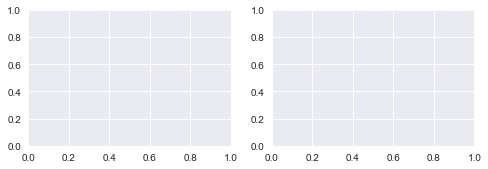

In [180]:
plt.subplot(2,2,1)
plt.subplot(2,2,2)
# plt.subplot(2,2,4)

plt.show()